# CM2604 Machine Learning Coursework

## Summary of tasks covered
1. Importing and analysing data present with charts and graphs
2. Feature selection and encoding categorical variables
3. Training a basic random forest regressor on the encoded data
4. Using grid search to find the best hyperparameters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Analysis

In [2]:
data = pd.read_csv('../data/bank.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [3]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4964,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Drop duplicates
duplicates = data.duplicated()
print(duplicates.sum())
data.drop_duplicates(inplace=True)

12



Target Variable Distribution (%):
y
no     36537
yes     4639
Name: count, dtype: int64


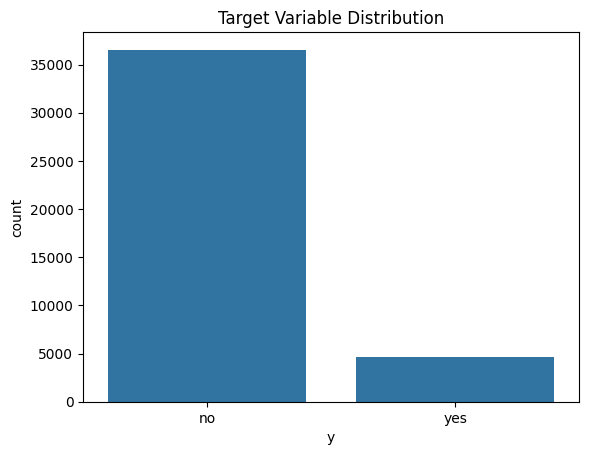

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable distribution
target_distribution = data['y'].value_counts()
print("\nTarget Variable Distribution (%):")
print(target_distribution)

# Plotting target variable distribution
sns.countplot(x='y', data=data)
plt.title("Target Variable Distribution")
plt.show()


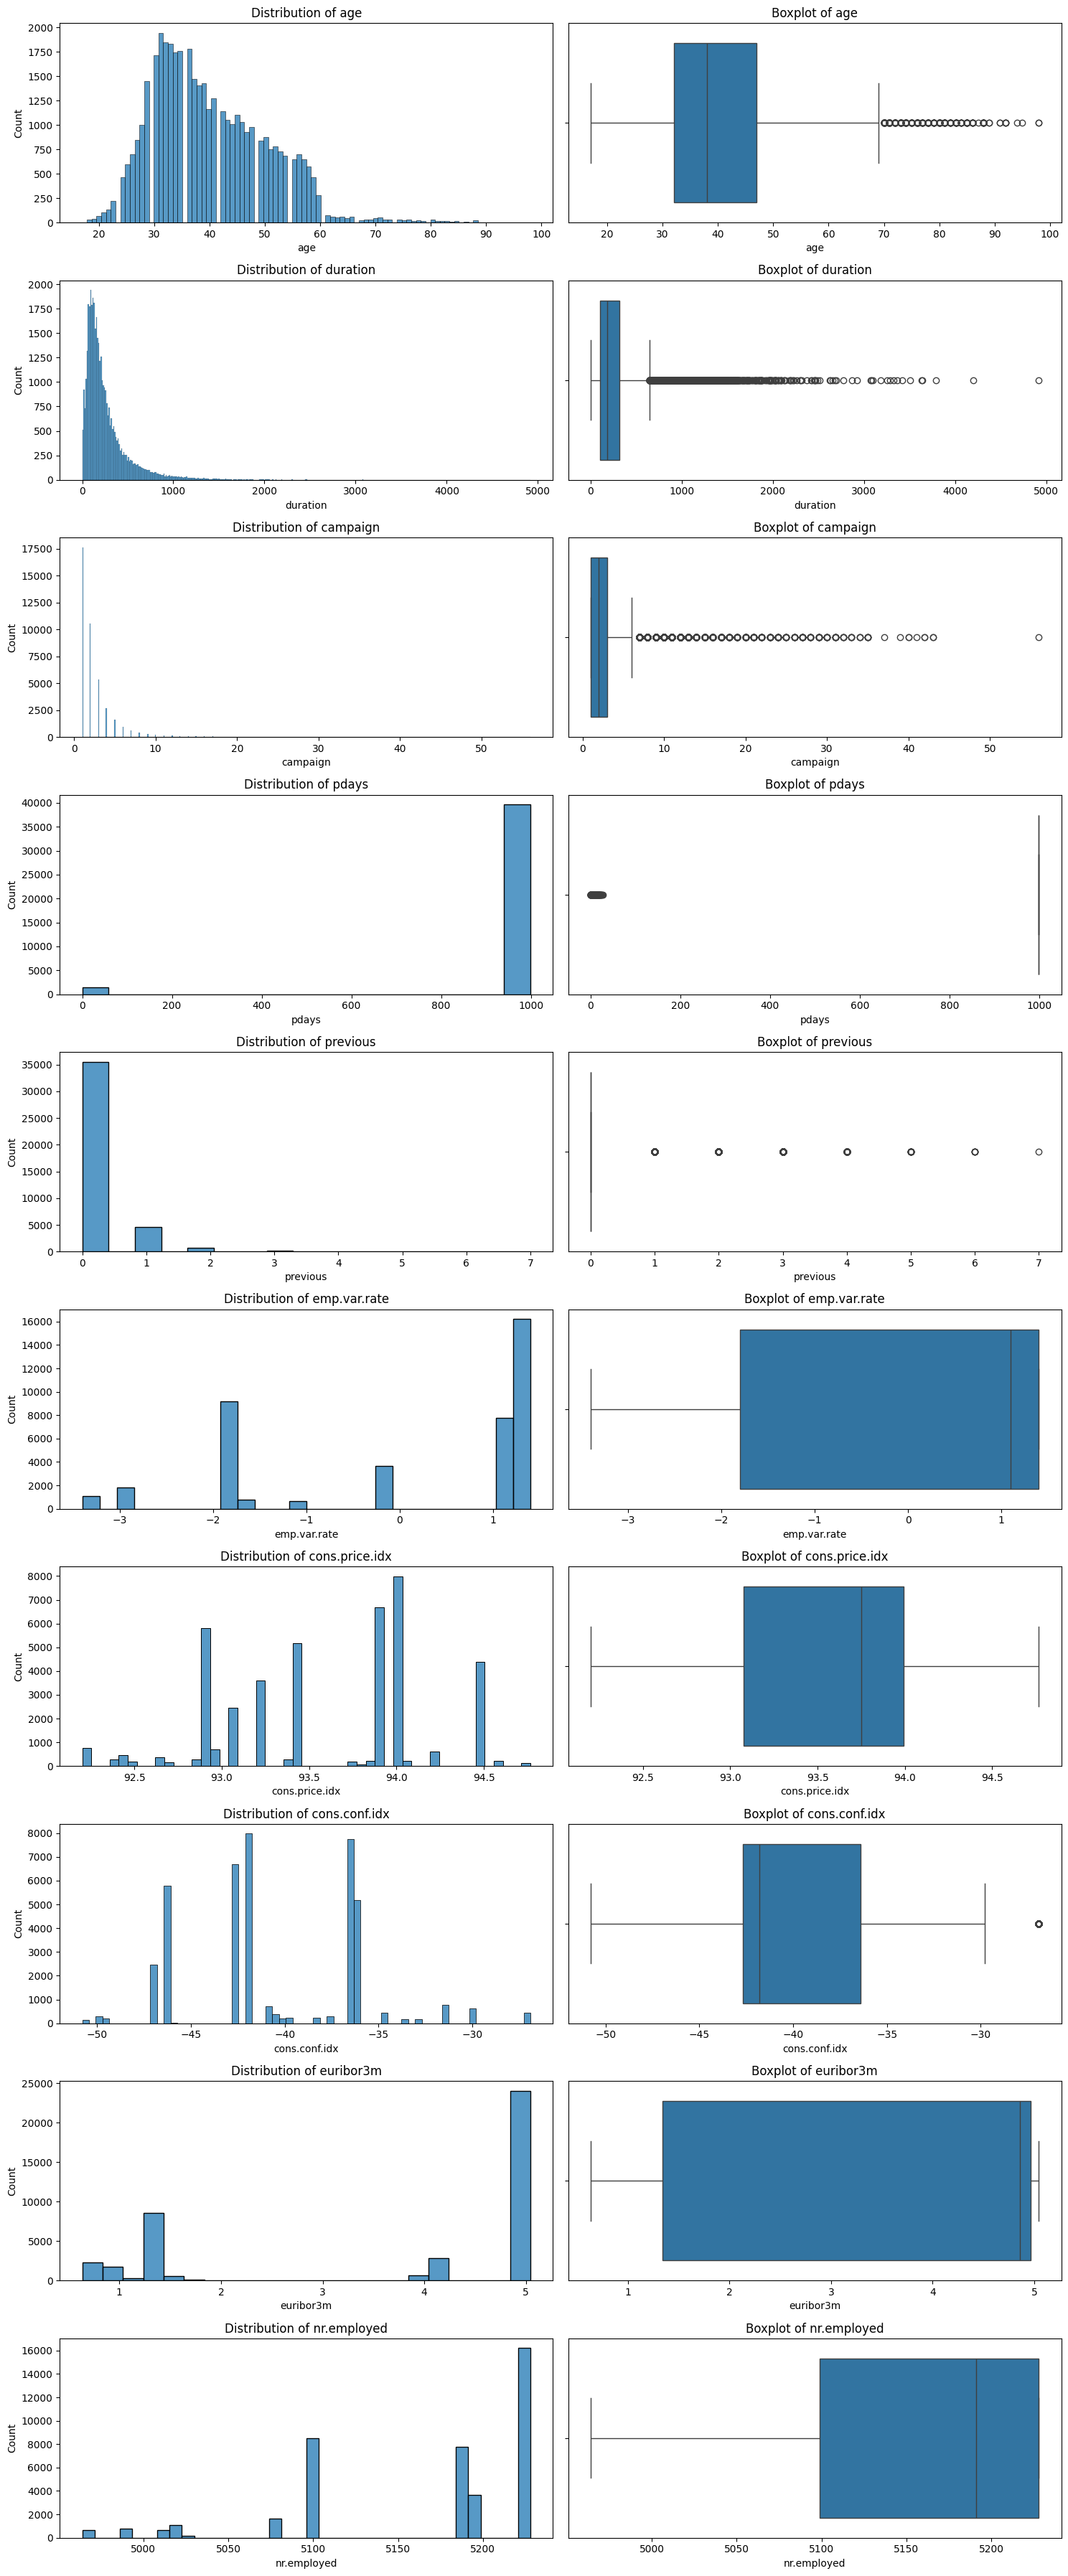

In [8]:
# Selecting numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns


# Create subplots for the box plots before and after outlier handling
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 36))

# Visualizing distributions
for i, feature in enumerate(numerical_features):
    sns.histplot(x=data[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {feature}")
    sns.boxplot(x=data[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f"Boxplot of {feature}")

    
plt.tight_layout()
plt.show()


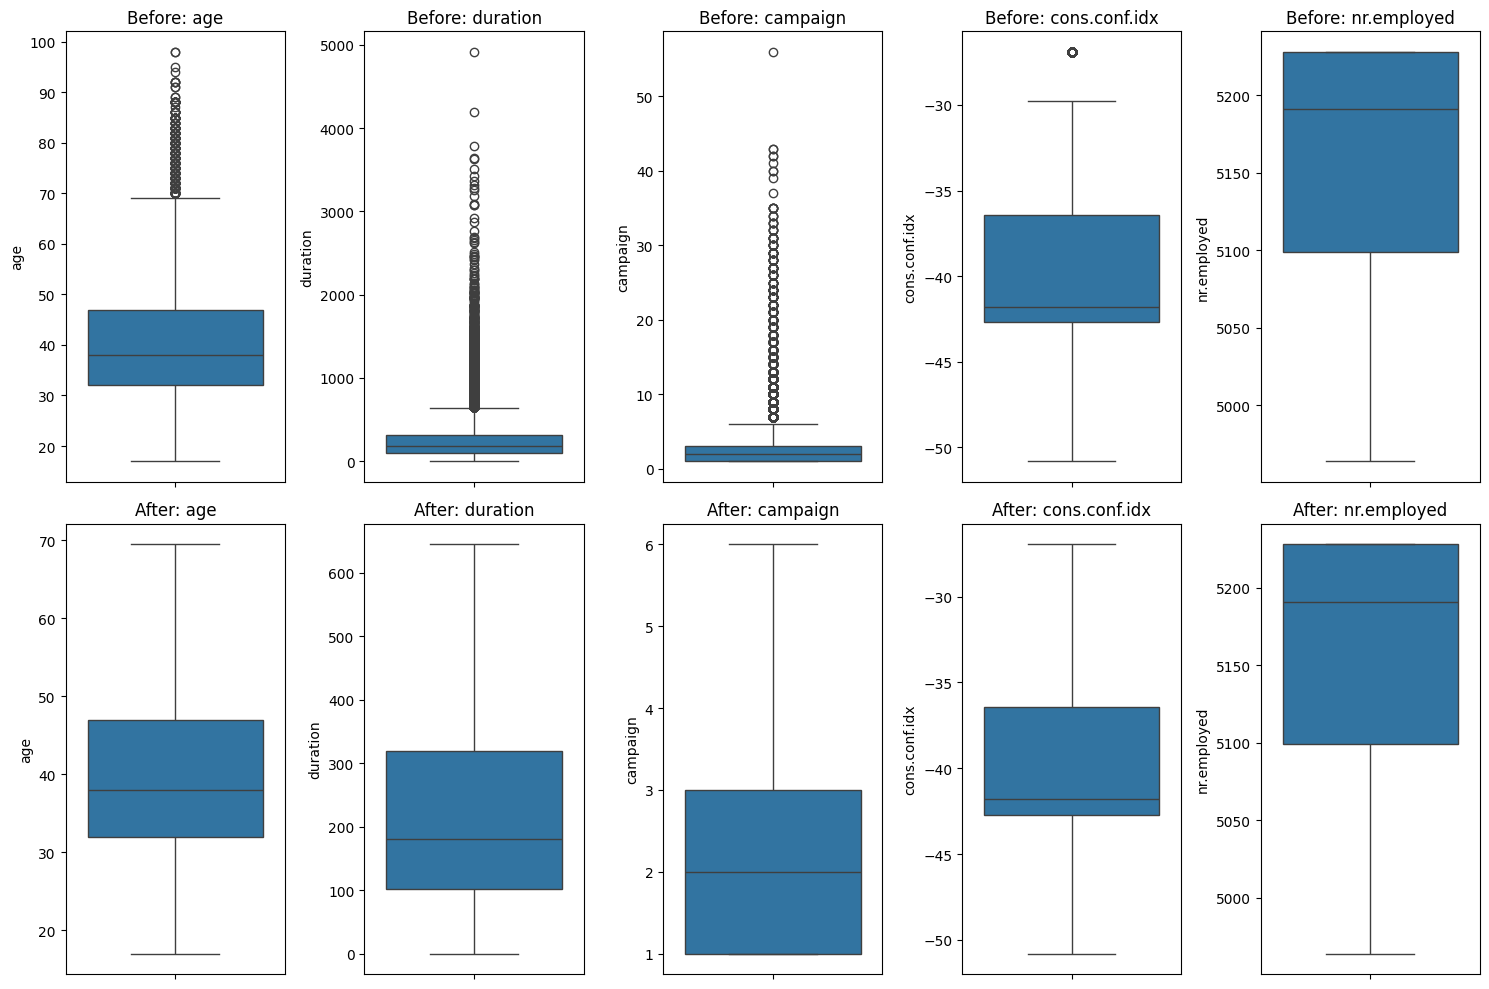

In [9]:
# Function to handle outliers
def handle_outliers_iqr(column):
    # Calculate quartiles
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count occurrences of outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    outlier_count = outliers.sum()

    return column.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    

# Replace the 999 for no days visited with 0
data['pdays'] = data['pdays'].replace(999, 0)
data_cleaned = data.copy()

numerical_cols = ['age', 'duration','campaign', 'cons.conf.idx', 'nr.employed']
# Apply outlier handling for each numerical column
for column in numerical_cols:
    data_cleaned[column] = handle_outliers_iqr(data[column])

# Create subplots for the box plots before and after outlier handling
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_cols), figsize=(15, 10))

# Plot box plots before outlier handling
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=data[column], ax=axes[0, i])
    axes[0, i].set_title(f'Before: {column}')

# Plot box plots after outlier handling
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=data_cleaned[column], ax=axes[1, i])
    axes[1, i].set_title(f'After: {column}')

data_cleaned.to_csv('../data/data_cleaned.csv', index=False)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [10]:
data = pd.read_csv("../data/data_cleaned.csv")

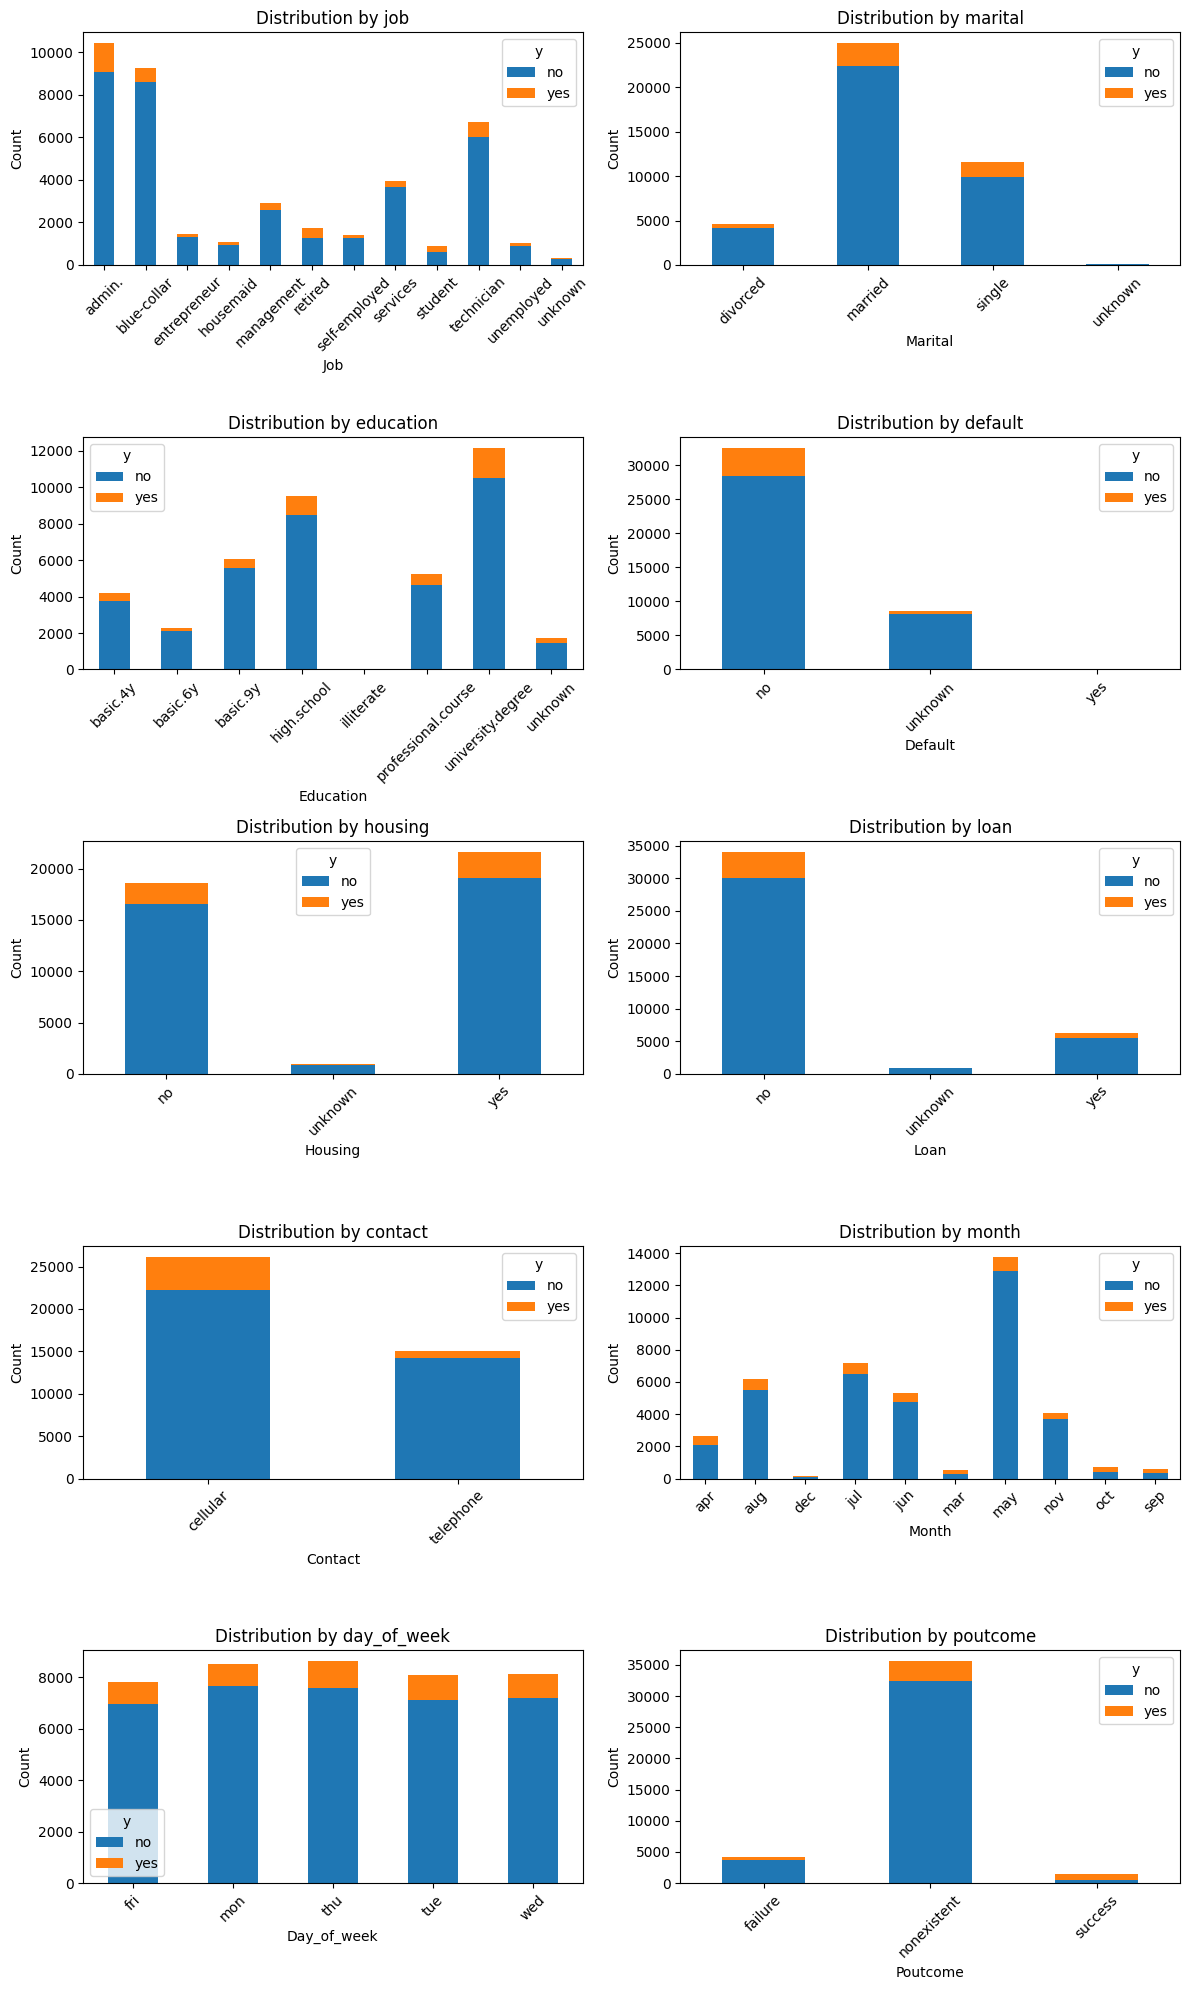

In [11]:
# List of categorical columns to plot
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Number of columns per row
cols_per_row = 2
num_rows = (len(columns) + cols_per_row - 1) // cols_per_row

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, num_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate through axes

# Loop through columns and plot
for idx, col in enumerate(columns):
    ax = axes[idx]  # Get the corresponding axis
    data.groupby([col, 'y']).size().unstack().plot(
        kind='bar', stacked=True, ax=ax, legend=True
    )
    ax.set_title(f"Distribution by {col}")  # Set title
    ax.set_ylabel('Count')  # Set y-axis label
    ax.set_xlabel(col.capitalize())  # Set x-axis label
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="y")  # Add legend title

# Hide unused subplots if any
for ax in axes[len(columns):]:
    ax.set_visible(False)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [12]:
for i in data.select_dtypes(include=['object']).columns:
    print(data[i].value_counts())
    print('\n')

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64


education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64


default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64


housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64


loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64


contact
cellular     26135
telephone    15041
Name: coun

In [13]:
data = data.drop(data[data['job'] == 'unknown'].index, axis =0, inplace=False)
data = data.drop(data[data['loan'] == 'unknown'].index, axis =0, inplace=False)
data = data.drop(data[data['housing'] == 'unknown'].index, axis =0, inplace=False)
data = data.drop(data[data['marital'] == 'unknown'].index, axis =0, inplace=False)

In [14]:
data.shape

(39791, 21)

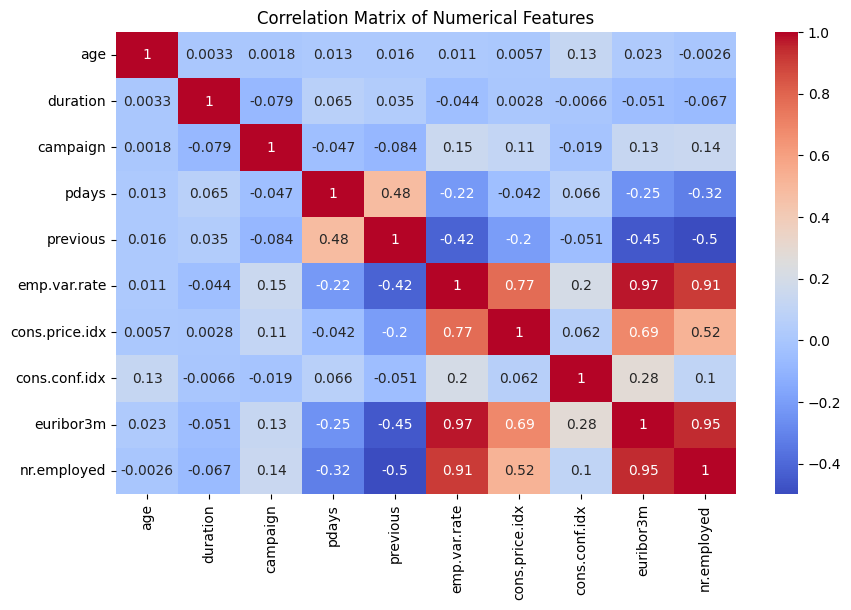

In [15]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()



## Encoding categorical variables

Test encoding in different methods

One hot encoding: marital, poutcome, contact

Binary encoding: loan, housing, default, job

Ordinal encoding: education

sin/cosine encoding: month, day_of_week

In [16]:
# Using ordinal encoding for y
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['no','yes']])
data['y_encoded'] = encoder.fit_transform(data[['y']])

# Using dummy encoding to encode marital, poutcome, contact
to_dummy_cols = pd.DataFrame(data[['marital', 'poutcome','contact']])
dummy_cols = pd.get_dummies(to_dummy_cols)


# Using binary encoding for loan, housing, default, y
from category_encoders import BinaryEncoder 
encoder = BinaryEncoder(cols =['loan', 'housing' ,'default', 'job']) 
# Transforming the column after fitting
newdata = encoder.fit_transform(data[['loan', 'housing' ,'default', 'job']])

# Using ordinal encoding for education
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["illiterate","unknown","basic.4y","basic.6y","basic.9y","high.school","professional.course","university.degree"]])
data['education_encoded'] = encoder.fit_transform(data[['education']])

# Sin/cosine encoding for month, day_of_week
# Map categorical values to numerical values
month_mapping = {month: i+1 for i, month in enumerate(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                                                       'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])}
day_mapping = {day: i+1 for i, day in enumerate(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])}

data['month_num'] = data['month'].map(month_mapping)
data['day_num'] = data['day_of_week'].map(day_mapping)

# Sine and Cosine Encoding
data['month_sin'] = np.sin(2 * np.pi * data['month_num'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month_num'] / 12)
data['day_sin'] = np.sin(2 * np.pi * data['day_num'] / 7)
data['day_cos'] = np.cos(2 * np.pi * data['day_num'] / 7)


# concatenating dataframe
data = pd.concat([data, newdata, dummy_cols], axis = 1) 
# dropping old column 
data = data.drop([ 'loan', 'housing', 'default','y','marital', 'poutcome','contact','job','month', 'day_of_week', 'month_num', 'day_num','education'], axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39791 entries, 0 to 41175
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   39791 non-null  float64
 1   duration              39791 non-null  float64
 2   campaign              39791 non-null  float64
 3   pdays                 39791 non-null  int64  
 4   previous              39791 non-null  int64  
 5   emp.var.rate          39791 non-null  float64
 6   cons.price.idx        39791 non-null  float64
 7   cons.conf.idx         39791 non-null  float64
 8   euribor3m             39791 non-null  float64
 9   nr.employed           39791 non-null  int64  
 10  y_encoded             39791 non-null  float64
 11  education_encoded     39791 non-null  float64
 12  month_sin             39791 non-null  float64
 13  month_cos             39791 non-null  float64
 14  day_sin               39791 non-null  float64
 15  day_cos               39

In [17]:

data.drop("y_encoded", axis=1).apply(lambda x: x.corr(data.y_encoded)).sort_values(ascending=False)
data.to_csv('../data/preprocessed_data.csv', index=False)


In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39791.0,39.895215,10.108436,17.000000,32.000000,3.800000e+01,47.000000,69.500000
duration,39791.0,235.257194,177.478687,0.000000,102.000000,1.800000e+02,320.000000,644.500000
campaign,39791.0,2.275339,1.549805,1.000000,1.000000,2.000000e+00,3.000000,6.000000
pdays,39791.0,0.220527,1.349857,0.000000,0.000000,0.000000e+00,0.000000,27.000000
previous,39791.0,0.172602,0.494060,0.000000,0.000000,0.000000e+00,0.000000,7.000000
emp.var.rate,39791.0,0.079822,1.569570,-3.400000,-1.800000,1.100000e+00,1.400000,1.400000
cons.price.idx,39791.0,93.573361,0.577877,92.201000,93.075000,9.374900e+01,93.994000,94.767000
cons.conf.idx,39791.0,-40.521837,4.626281,-50.800000,-42.700000,-4.180000e+01,-36.400000,-26.950000
euribor3m,39791.0,3.618799,1.734234,0.634000,1.344000,4.857000e+00,4.961000,5.045000
nr.employed,39791.0,5167.016109,72.131579,4964.000000,5099.000000,5.191000e+03,5228.000000,5228.000000


In [19]:
X = data.drop(['y_encoded', ], axis=1)
y = data[['y_encoded']]

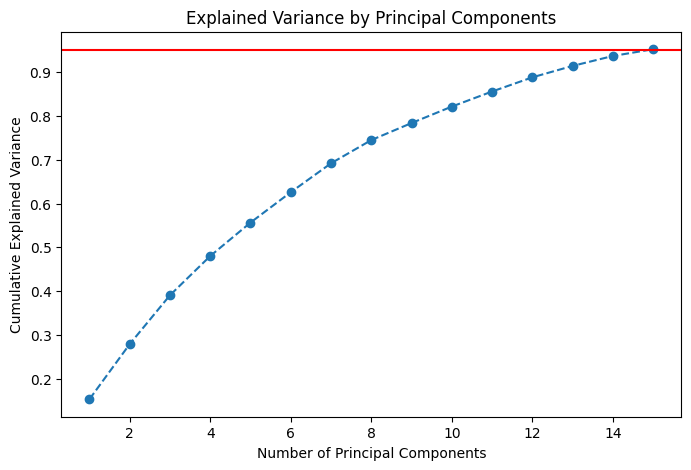

Number of components to retain for 95% variance: 15


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from imblearn.over_sampling import SMOTE

# Assuming 'X' is your feature matrix
# Scale the features
scaler = QuantileTransformer(output_distribution='normal')
X_scaled = scaler.fit_transform(X)


# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio from PCA
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# Determine the number of components to retain
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain for 95% variance: {n_components}")



In [21]:
# Get the loadings for the retained components
loadings = pca.components_[:n_components]

# Create a DataFrame to better interpret feature contributions
import pandas as pd
loading_df = pd.DataFrame(loadings, columns=X.columns, 
                          index=[f"PC{i+1}" for i in range(n_components)])
loading_df


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_2,job_3,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
PC1,-0.025290,0.004863,-0.038115,0.034112,0.107470,-0.084920,-0.065903,-0.015400,-0.034597,-0.076045,...,0.253578,0.243003,0.026396,-0.262296,0.235899,0.120862,-0.164403,0.043542,0.429277,-0.429277
PC2,0.023352,-0.000777,-0.006049,-0.005116,-0.000781,0.007352,-0.007056,-0.006562,0.004293,0.010177,...,-0.245912,-0.179361,-0.032084,0.218550,-0.186466,0.005285,0.000423,-0.005708,0.067330,-0.067330
PC3,-0.025899,-0.008999,0.041644,-0.022730,-0.101519,0.041203,0.059154,0.019354,0.016865,0.029478,...,0.301372,0.161758,0.038751,-0.224842,0.186091,-0.128726,0.156800,-0.028074,-0.456254,0.456254
PC4,0.044720,0.000055,-0.004054,0.005472,0.014444,-0.006272,-0.008954,0.008879,0.001104,-0.001263,...,0.449176,0.068841,-0.076414,0.578148,-0.501734,0.014837,-0.021940,0.007103,0.062476,-0.062476
PC5,-0.004088,-0.001711,0.043037,-0.033958,-0.108161,0.196317,0.005297,-0.009227,0.058010,0.197772,...,0.101787,-0.005697,0.031275,-0.207064,0.175789,-0.122631,0.165536,-0.042905,0.234745,-0.234745
PC6,-0.009199,-0.005885,0.075908,-0.068628,-0.279202,0.306579,0.028060,0.014821,0.098624,0.310922,...,-0.116731,0.358123,-0.022940,0.115061,-0.092121,-0.343940,0.429130,-0.085190,0.131023,-0.131023
PC7,-0.000408,0.000011,0.003168,-0.016434,-0.067707,0.067800,0.004925,0.005227,0.021547,0.069011,...,-0.001661,0.080591,0.001676,0.021688,-0.023364,-0.084138,0.104227,-0.020089,0.039115,-0.039115
PC8,0.002038,-0.006820,-0.017490,0.037614,0.141874,-0.072566,-0.000304,0.023120,-0.017571,-0.077050,...,-0.124897,0.806123,-0.059000,0.083295,-0.024296,0.171728,-0.217747,0.046019,-0.100331,0.100331
PC9,0.062370,-0.010811,0.098596,-0.002873,0.020170,0.032438,0.008651,-0.005053,0.001447,0.032403,...,0.199210,-0.033235,0.497253,-0.217422,-0.279830,0.037127,-0.031608,-0.005520,0.000649,-0.000649
PC10,-0.054205,-0.008919,0.060963,0.003918,-0.000259,-0.003303,-0.000474,-0.004377,-0.008282,-0.004657,...,-0.249877,0.019412,-0.458000,0.189850,0.268150,-0.004374,0.000578,0.003796,0.003385,-0.003385


## Split into Train and Test

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31, test_size=0.2, shuffle=True, stratify=y)

## Random Forest without SMOTE

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

rfc_without_smote = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200, n_jobs=-1, random_state=31)
rfc_without_smote.fit(X_train, y_train)


# Checking scores
y_predict = (rfc_without_smote.predict(X_test)>0.5).astype("int32")

# Predicting the accuracy score for Random Forest Classifier 
print('\n')
print('--------------Random Forest Classifier without smote--------------')
print('\n')

print(classification_report(y_test, y_predict))



--------------Random Forest Classifier without smote--------------


              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      7062
         1.0       0.70      0.49      0.58       897

    accuracy                           0.92      7959
   macro avg       0.82      0.73      0.77      7959
weighted avg       0.91      0.92      0.91      7959



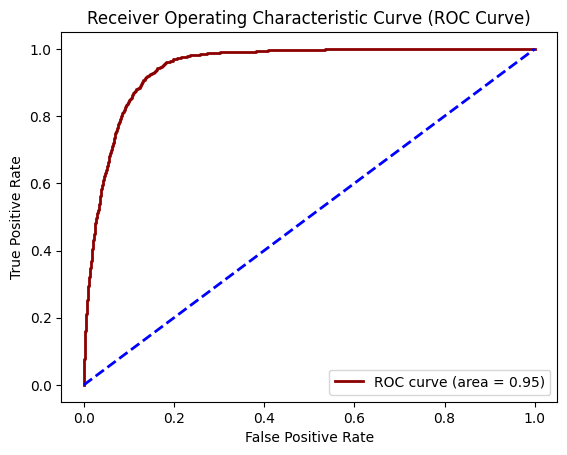


Confusion Matrix for Random Forest Classifier:


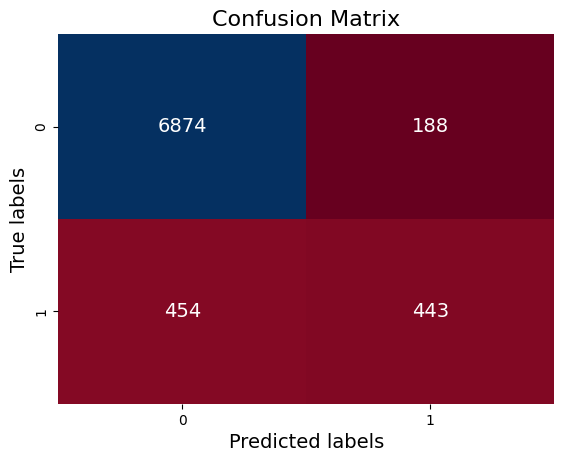

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = rfc_without_smote.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic Curve (ROC Curve)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Print Confusion Matrix for Random Forest Classifier
print("\nConfusion Matrix for Random Forest Classifier:")
cm = confusion_matrix(y_test,y_predict )
sns.heatmap(cm, annot=True, cmap='RdBu', fmt='g', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## Random Forest with SMOTE

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
from imblearn.over_sampling import KMeansSMOTE, BorderlineSMOTE, SMOTE, SVMSMOTE, RandomOverSampler, ADASYN

smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)
rfc = RandomForestClassifier(random_state=31, n_jobs=-1, n_estimators=250, min_samples_leaf=35, max_depth=25)
rfc.fit(X_train, y_train)


# Checking scores
y_predict = (rfc.predict(X_test)>0.5).astype("int32")

# Predicting the accuracy score for Random Forest Classifier 
print('\n')
print('--------------Random Forest Classifier--------------')
print('\n')

print(classification_report(y_test, y_predict))



--------------Random Forest Classifier--------------


              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      7062
         1.0       0.53      0.83      0.65       897

    accuracy                           0.90      7959
   macro avg       0.75      0.87      0.79      7959
weighted avg       0.93      0.90      0.91      7959



Tuning the threshold

In [26]:
from sklearn.metrics import precision_score

# Get predicted probabilities
y_probs = rfc.predict_proba(X_test)[:, 1]

# Adjust the threshold
threshold = 0.58
y_pred_adjusted = (y_probs > threshold).astype(int)

# Calculate precision
precision = precision_score(y_test, y_pred_adjusted)
print("Adjusted Precision:", precision)
print('\n')
print('--------------Random Forest Classifier--------------')
print('\n')
print(classification_report(y_test, y_pred_adjusted))


Adjusted Precision: 0.5958904109589042


--------------Random Forest Classifier--------------


              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      7062
         1.0       0.60      0.68      0.63       897

    accuracy                           0.91      7959
   macro avg       0.78      0.81      0.79      7959
weighted avg       0.92      0.91      0.91      7959



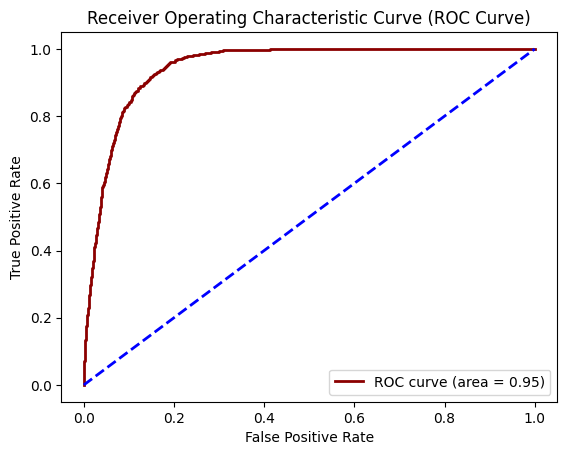


Confusion Matrix for Random Forest Classifier:


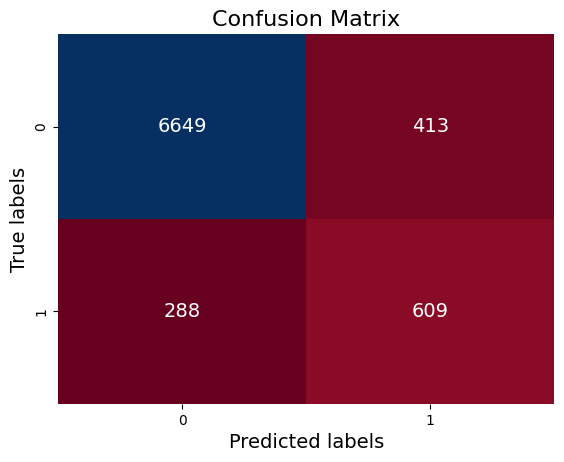

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)


# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic Curve (ROC Curve)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Print Confusion Matrix for Random Forest Classifier
print("\nConfusion Matrix for Random Forest Classifier:")
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, cmap='RdBu', fmt='g', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## Using grid search

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

# Reduced parameter grid
params = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 20],
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt']
}

# Randomized search
rf = RandomForestClassifier(random_state=31, n_jobs=-1)
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=params,
                                   n_iter=20,
                                   cv=3,
                                   n_jobs=-1,
                                   verbose=1,
                                   scoring='f1')

# Train on a subsample for faster tuning

random_search.fit(X_train, y_train)
print(random_search.best_score_)
rf_best = random_search.best_estimator_
print(rf_best)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
0.9330717008492798
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=31)


## Artificial Neural Network Implementation

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from sklearn.metrics import *

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, random_state=31, test_size=0.2)
smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)

# Define the neural network architecture
model = Sequential([
    Dense(96, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    Dropout(0.4), # To prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid') # Output layer - Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    verbose=1, 
                    )

# Evaluate the model based on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Generate classification report
from sklearn.metrics import classification_report

# Predict on validation data
y_predict = (model.predict(X_val)>0.7).astype("int32")
print(classification_report(y_val, y_predict))

Epoch 1/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7490 - loss: 0.5461 - val_accuracy: 0.8232 - val_loss: 0.3686
Epoch 2/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8709 - loss: 0.3210 - val_accuracy: 0.8453 - val_loss: 0.3178
Epoch 3/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8825 - loss: 0.2938 - val_accuracy: 0.8678 - val_loss: 0.2692
Epoch 4/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8920 - loss: 0.2772 - val_accuracy: 0.8730 - val_loss: 0.2634
Epoch 5/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8925 - loss: 0.2713 - val_accuracy: 0.8607 - val_loss: 0.2947
Epoch 6/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8975 - loss: 0.2623 - val_accuracy: 0.8482 - val_loss: 0.3212
Epoch 7/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8999 - loss: 0.2584 - val_accuracy: 0.8632 - val_loss: 0.2712
Epoch 8/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9010 - loss: 0.2515 - 

In [30]:
# Predict on validation data
print('\n')
print('--------------Neural Network Classifier--------------')
print('\n')
y_predict = (model.predict(X_val)>0.6).astype("int32")
print(classification_report(y_val, y_predict))



--------------Neural Network Classifier--------------


249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      7024
         1.0       0.50      0.81      0.62       935

    accuracy                           0.88      7959
   macro avg       0.74      0.85      0.77      7959
weighted avg       0.92      0.88      0.89      7959



In [31]:
from keras_tuner import HyperModel

# Define the hypermodel class
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # Input layer - 1st hidden layer
        model.add(Dense(units=hp.Int('units_input', min_value=64, max_value=256, step=32),
                        activation='relu', input_shape=(X_train.shape[1],)))
        
        # Add a dropout layer
        model.add(Dropout(rate=hp.Float('dropout_input', min_value=0.1, max_value=0.5, step=0.1)))

        # Second hidden layer
        model.add(Dense(units=hp.Int('units_hidden', min_value=32, max_value=128, step=32), activation='relu'))
        
        # Add a dropout layer
        model.add(Dropout(rate=hp.Float('dropout_hidden', min_value=0.1, max_value=0.5, step=0.1)))

        # Add the output layer
        model.add(Dense(1, activation='sigmoid')) # Binary classification

        # Compile the model
        model.compile(
            optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
            loss = 'binary_crossentropy',
            metrics=['accuracy']
        )
        return model
    

In [32]:
from keras_tuner.tuners import RandomSearch

# Initialize the tuner
tuner = RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_tuning_dir',
    project_name='bank_ann'
)

tuner.search(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=20,
             batch_size=32)

# Show a summary of the search
tuner.results_summary()

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The best number of units for the input layer is {best_hps.get('units_input')},
Dropout rate for input layer is {best_hps.get('dropout_input')},
Hidden layer units are {best_hps.get('units_hidden')},
Dropout rate for hidden layer is {best_hps.get('dropout_hidden')},
and the optimizer is {best_hps.get('optimizer')}.
""")



Trial 10 Complete [00h 02m 02s]
val_accuracy: 0.8787536025047302

Best val_accuracy So Far: 0.8818947076797485
Total elapsed time: 00h 19m 10s
Results summary
Results in my_tuning_dir\bank_ann
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
units_input: 160
dropout_input: 0.1
units_hidden: 64
dropout_hidden: 0.1
optimizer: rmsprop
Score: 0.8818947076797485

Trial 06 summary
Hyperparameters:
units_input: 128
dropout_input: 0.1
units_hidden: 64
dropout_hidden: 0.30000000000000004
optimizer: rmsprop
Score: 0.8810780048370361

Trial 09 summary
Hyperparameters:
units_input: 192
dropout_input: 0.30000000000000004
units_hidden: 128
dropout_hidden: 0.2
optimizer: rmsprop
Score: 0.8787536025047302

Trial 00 summary
Hyperparameters:
units_input: 224
dropout_input: 0.30000000000000004
units_hidden: 32
dropout_hidden: 0.5
optimizer: rmsprop
Score: 0.8778112828731537

Trial 03 summary
Hyperparameters:
units_input: 256
dropout_input: 0.5
unit

In [33]:
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(X_train, y_train,
                         validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=32,
                        verbose=1)

# Save the best model
best_model.save('best_neural_network_model.h5')

# Predict on validation data
y_pred = (best_model.predict(X_val) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_val, y_pred))

Epoch 1/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8265 - loss: 0.4058 - val_accuracy: 0.8158 - val_loss: 0.4140
Epoch 2/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8911 - loss: 0.2828 - val_accuracy: 0.8490 - val_loss: 0.3275
Epoch 3/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8992 - loss: 0.2624 - val_accuracy: 0.8502 - val_loss: 0.3217
Epoch 4/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9056 - loss: 0.2533 - val_accuracy: 0.8653 - val_loss: 0.3142
Epoch 5/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9085 - loss: 0.2413 - val_accuracy: 0.8455 - val_loss: 0.3473
Epoch 6/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9117 - loss: 0.2380 - val_accuracy: 0.8725 - val_loss: 0.2921
Epoch 7/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9134 - loss: 0.2357 - val_accuracy: 0.8691 - val_loss: 0.2996
Epoch 8/50
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9166 - loss: 0.2301 - 

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      7024
         1.0       0.50      0.80      0.61       935

    accuracy                           0.88      7959
   macro avg       0.73      0.84      0.77      7959
weighted avg       0.91      0.88      0.89      7959



249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step

AUC-ROC Score: 0.9243785249655878


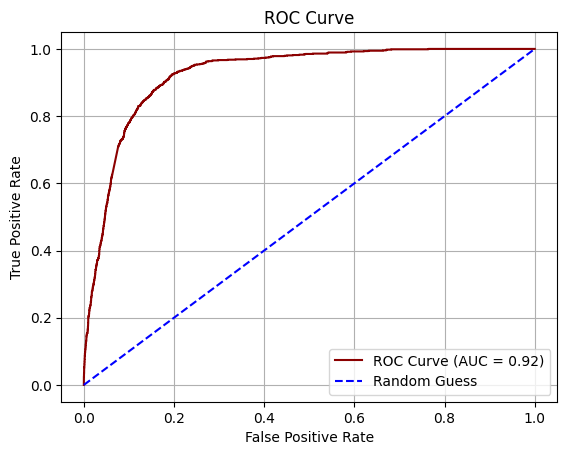


Confusion Matrix for Artificial Neural Network:


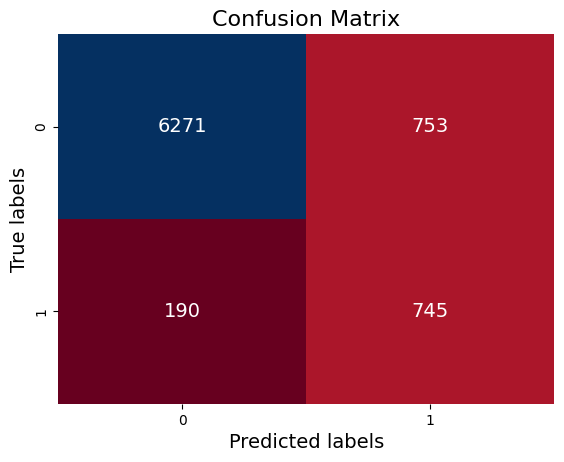

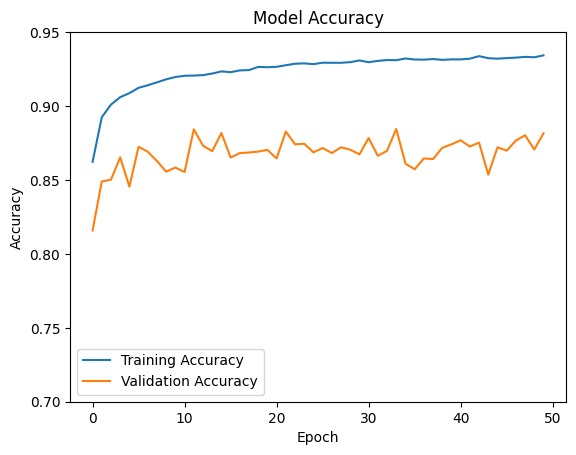

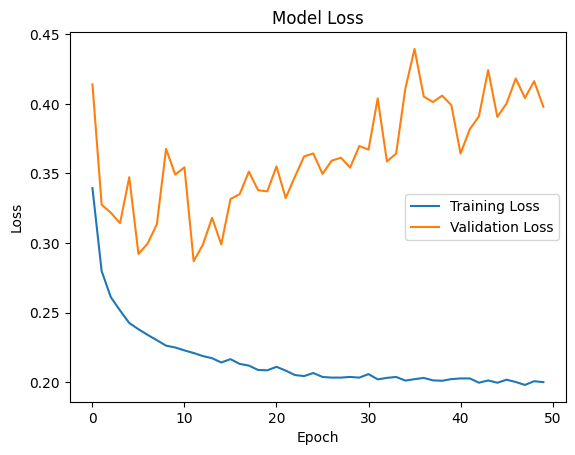

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
y_pred_proba =best_model.predict(X_val).flatten()

# Compute AUC-ROC
roc_auc = roc_auc_score(y_val, y_pred_proba)
print("\nAUC-ROC Score:", roc_auc)

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkred', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Print Confusion Matrix for Neural Network
print("\nConfusion Matrix for Artificial Neural Network:")
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, cmap='RdBu', fmt='g', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylim(0.7, 0.95)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
